## 1. HR Analytics

In [823]:
# import the required packages
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import random
import statsmodels.api as sm
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
%matplotlib inline
from scipy.stats import norm

#Import stats to utilise z-score formula
from scipy import stats

### 1.1 Load and Explore the data

In [824]:
# Load the full dataset
df = pd.read_csv('hr_data.csv')

In [825]:
# Create a copy of the DataFrame
df_new = df.copy()

In [826]:
# Show overview of the dataset
df_new.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [827]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [828]:
print(df_new.describe())

        employee_id  no_of_trainings           age  previous_year_rating  \
count  54808.000000     54808.000000  54808.000000          50684.000000   
mean   39195.830627         1.253011     34.803915              3.329256   
std    22586.581449         0.609264      7.660169              1.259993   
min        1.000000         1.000000     20.000000              1.000000   
25%    19669.750000         1.000000     29.000000              3.000000   
50%    39225.500000         1.000000     33.000000              3.000000   
75%    58730.500000         1.000000     39.000000              4.000000   
max    78298.000000        10.000000     60.000000              5.000000   

       length_of_service  KPIs_met >80%   awards_won?  avg_training_score  \
count       54808.000000   54808.000000  54808.000000        54808.000000   
mean            5.865512       0.351974      0.023172           63.386750   
std             4.265094       0.477590      0.150450           13.371559   
min    

###### Numeric Data

In [829]:
# numeric data
df_num = df_new.select_dtypes(['int64', 'float64']).copy()
df_num.head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,1,35,5.0,8,1,0,49,0
1,65141,1,30,5.0,4,0,0,60,0
2,7513,1,34,3.0,7,0,0,50,0
3,2542,2,39,1.0,10,0,0,50,0
4,48945,1,45,3.0,2,0,0,73,0


In [830]:
df_num.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


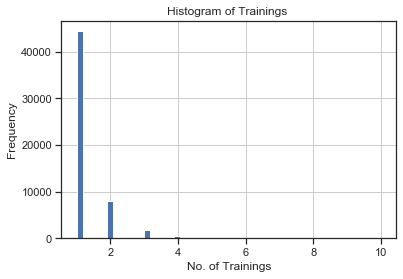

In [831]:
# Visualize Number of Trainings
plt.hist(df_num['no_of_trainings'].dropna(), bins=50)
plt.xlabel('No. of Trainings')
plt.ylabel('Frequency') 
plt.title('Histogram of Trainings ')
plt.grid(True)

plt.show()

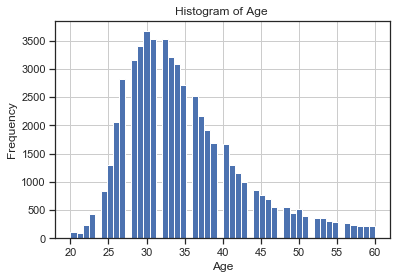

In [832]:
# Visualize Age
plt.hist(df_num['age'].dropna(), bins=50)
plt.xlabel('Age')
plt.ylabel('Frequency') 
plt.title('Histogram of Age ')
plt.grid(True)

plt.show()

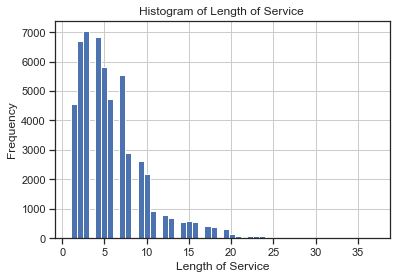

In [833]:
# Visualize Length of Service
plt.hist(df_num['length_of_service'].dropna(), bins=50)
plt.xlabel('Length of Service')
plt.ylabel('Frequency') 
plt.title('Histogram of Length of Service ')
plt.grid(True)

plt.show()

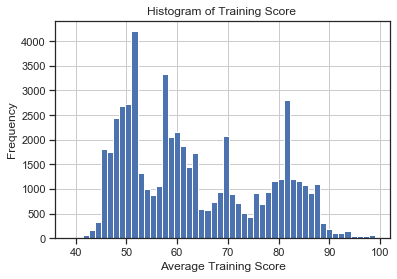

In [834]:
# Visualize Training Score
plt.hist(df_num['avg_training_score'].dropna(), bins=50)
plt.xlabel('Average Training Score')
plt.ylabel('Frequency') 
plt.title('Histogram of Training Score ')
plt.grid(True)

plt.show()

###### Categorical Data

In [835]:
# categorical data
df_cat = df_new.select_dtypes(['object']).copy()
df_cat.head()

,department,region,education,gender,recruitment_channel
0,Sales & Marketing,region_7,Master's & above,f,sourcing
1,Operations,region_22,Bachelor's,m,other
2,Sales & Marketing,region_19,Bachelor's,m,sourcing
3,Sales & Marketing,region_23,Bachelor's,m,other
4,Technology,region_26,Bachelor's,m,other


In [836]:
df_cat.describe()

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


In [837]:
df_cat.nunique()

department              9
region                 34
education               3
gender                  2
recruitment_channel     3
dtype: int64

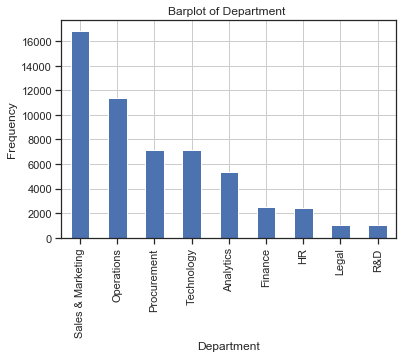

In [838]:
# visualize Department
df_cat.department.value_counts().plot.bar() #Note: "department" is a column of the data frame
plt.xlabel('Department')
plt.ylabel('Frequency') 
plt.title('Barplot of Department ')
plt.grid(True)
plt.show()

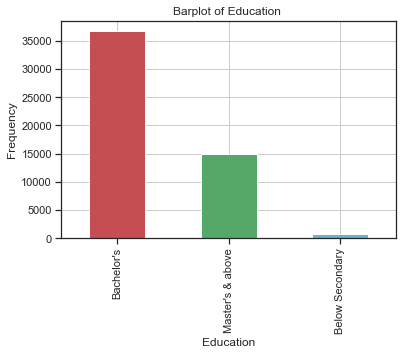

In [839]:
# visualize Education
colors = ['r', 'g', 'c']
df_cat.education.value_counts().plot.bar(color= colors) 
plt.xlabel('Education')
plt.ylabel('Frequency') 
plt.title('Barplot of Education ')
plt.grid(True)
plt.show()

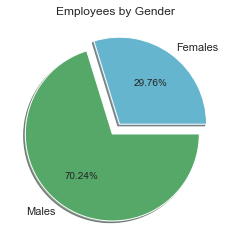

In [840]:
# Piechart of Geender
female_proportion = df_new['gender'].loc[df_new['gender'] == 'f'].count()
male_proportion = df_new['gender'].loc[df_new['gender'] == 'm'].count()

values = [female_proportion, male_proportion]
colors = ['c', 'g']
explode = [0.07, 0.07] # specifies the fraction of the radius with which to offset each wedge
labels = ['Females', 'Males']
plt.pie(values, colors= colors, labels=labels, shadow=True, explode = explode, autopct='%1.2f%%')
plt.title('Employees by Gender')
plt.show()

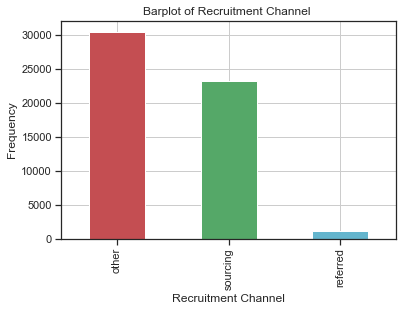

In [841]:
# visualize Recruitment Channel
colors = ['r', 'g', 'c']
df_cat.recruitment_channel.value_counts().plot.bar(color = colors) #Note: "recruitment_channel" is a column of the data frame
plt.xlabel('Recruitment Channel')
plt.ylabel('Frequency') 
plt.title('Barplot of Recruitment Channel ')
plt.grid(True)
plt.show()

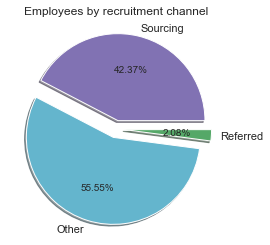

In [842]:
# Piechart of recruitment channel
df_sourcing = df_new['recruitment_channel'].loc[df_new['recruitment_channel'] == 'sourcing'].count()
df_other = df_new['recruitment_channel'].loc[df_new['recruitment_channel'] == 'other'].count()
df_referred = df_new['recruitment_channel'].loc[df_new['recruitment_channel'] == 'referred'].count()

values = [df_sourcing, df_other, df_referred]
colors = ['m','c', 'g']
explode = [0.1, 0.1, 0.1] # specifies the fraction of the radius with which to offset each wedge
labels = ['Sourcing', 'Other', 'Referred']
plt.pie(values, colors= colors, labels=labels, shadow=True, explode = explode, autopct='%1.2f%%')
plt.title('Employees by recruitment channel')
plt.show()

###### Relationhip

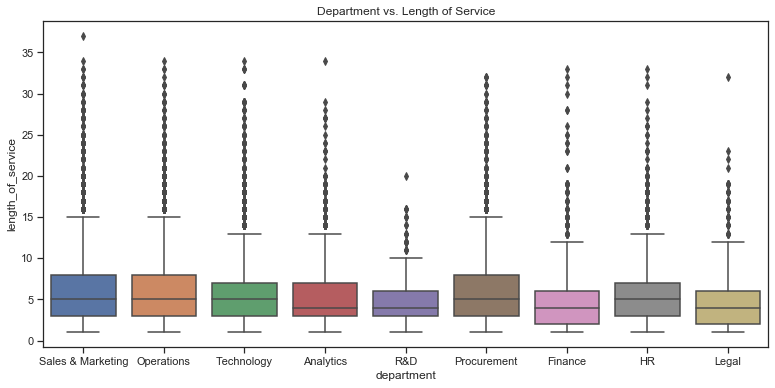

In [843]:
#Length of service distribution among different department 
plt.figure(figsize=(13,6))
sns.boxplot(y='length_of_service', x='department', data=df_new) 
plt.title('Department vs. Length of Service')
plt.show()

Text(0.5, 1.0, 'KPIs Met per Department and Gender')

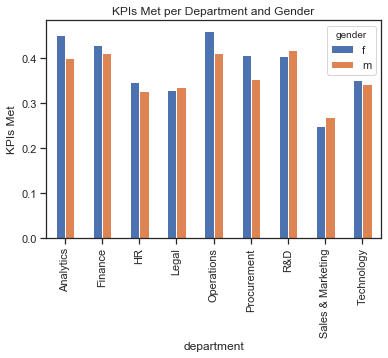

In [844]:
# Average KPIs met per department for each gender
df_new = df.rename(columns={'KPIs_met >80%': 'KPIs_met'})
df_new.groupby(['gender','department']).KPIs_met.mean().unstack(0).plot.bar()
plt.ylabel('KPIs Met')
plt.title('KPIs Met per Department and Gender')

Text(0.5, 1.0, 'No of Trainings vs Average Training Score')

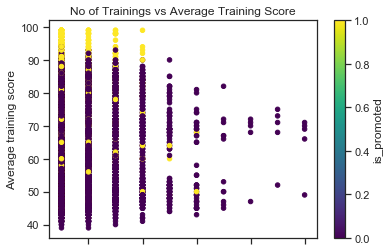

In [845]:
df_new.plot.scatter(x='no_of_trainings',
                      y='avg_training_score',
                      c='is_promoted',
                      colormap='viridis')
plt.xlabel('No of trainings') 
plt.ylabel('Average training score')
plt.title('No of Trainings vs Average Training Score')

### 1.2 Cleanse and Transform the data

#### (i) Removing NULL values

In [846]:
#identifying NULL values of each column
df_new.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met                   0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [847]:
# Create a list of unique values in df_new.education
list(df_new['education'].unique())

["Master's & above", "Bachelor's", nan, 'Below Secondary']

In [848]:
# Most frequent data in the education column
df_new['education'].mode()

0    Bachelor's
dtype: object

In [849]:
# Education Column: replaace null values in Education Column with mode
df_new['education'] = df_new['education'].fillna("Bachelor's") 
df_new.isnull().sum()

employee_id                0
department                 0
region                     0
education                  0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met                   0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [850]:
# Create a list of unique values in df_new.previous_year_rating
list(df_new['previous_year_rating'].unique())

[5.0, 3.0, 1.0, 4.0, nan, 2.0]

In [851]:
# Median data in the previous_year_rating column
df_new['previous_year_rating'].median()

3.0

In [852]:
df_new['previous_year_rating'] = df_new['previous_year_rating'].fillna("3").astype(float)
df_new.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met                0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

#### (ii) Outliers

###### Identifying outliers (length of service)

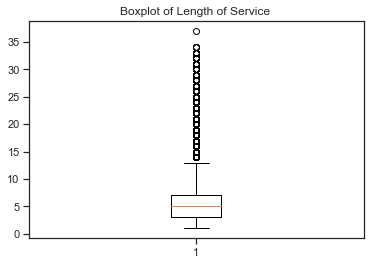

In [853]:
# Boxplot before treatment
plt.boxplot(df_new['length_of_service'].dropna())
plt.title('Boxplot of Length of Service ')

plt.show()

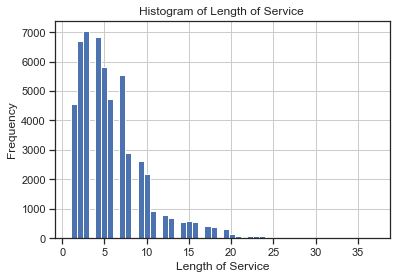

In [854]:
# Histogram before treatment
plt.hist(df_new['length_of_service'].dropna(), bins=50)
plt.xlabel('Length of Service')
plt.ylabel('Frequency') 
plt.title('Histogram of Length of Service ')
plt.grid(True)

plt.show()

In [855]:
#Count the number of outliers 

Q1 = df_new['length_of_service'].quantile(0.25)
Q3 = df_new['length_of_service'].quantile(0.75)
IQR = Q3 - Q1
Min_value = Q1 - (IQR*1.5)
Max_value = Q3 + (IQR*1.5)
print("Minimum value: {}".format(round(Min_value)))
print("Maximum value: {}".format(round(Max_value)))


total_length_of_service = len(df_new['length_of_service'])
df_length_of_service = df_new['length_of_service'][(df_new['length_of_service'] > Max_value) | (df_new['length_of_service'] < Min_value)]
num_outliers = df_length_of_service.count()
percentage_outliers_rpm = (num_outliers/total_length_of_service)*100
print("% of Outliers in length_of_service: {}%".format(round(percentage_outliers_rpm)))

Minimum value: -3.0
Maximum value: 13.0
% of Outliers in length_of_service: 6.0%


###### Treating outliers (length_of_service)

No treatment

Method #1: Removal of outliers

In [856]:
#df_new['length_of_service'].describe()

In [857]:
#Q1 = 3.000000
#Q3 = 7.000000
#IQR = Q3 - Q1
#Min_value = Q1 - (IQR*1.5)
#Max_value = Q3 + (IQR*1.5)
#print("Minimum value: {}".format(round(Min_value)))
#print("Maximum value: {}".format(round(Max_value)))

In [858]:
#Count the number of outliers 
#num = 0
#for item in df_new['length_of_service']:
    #if (item > 13) | (item < -3):
        #num = num + 1
#outliers_los = num
#total_los = len(df_new['length_of_service'])
#percentage_outliers_los = (outliers_los/total_los)*100

#print("% of Outliers in length_of_service: {}%".format(round(percentage_outliers_los)))

In [859]:
#Removing the outliers
#df_new = df_new.drop(df_new[df_new.length_of_service > 13].index | df_new[df_new.length_of_service < -3].index)

In [860]:
# Boxplot after treatment
#plt.boxplot(df_new['length_of_service'].dropna())
#plt.title('Boxplot of Length of Service ')

#plt.show()

In [861]:
# Histogram after treatment
#plt.hist(df_new['length_of_service'].dropna(), bins=50)
#plt.xlabel('Length of Service')
#plt.ylabel('Frequency') 
#plt.title('Histogram of Length of Service ')
#plt.grid(True)

#plt.show()

In [862]:
#df_new['length_of_service'].describe()

Method #2: Min-Max normalisation

In [863]:
#df_new['length_of_service'].describe()

In [864]:
# Min-Max normalization for AGE column
#df_new["length_of_service"] = (df_new["length_of_service"] - df_new["length_of_service"].min()) / (df_new["length_of_service"].max()-df_new["length_of_service"].min())
#df_new.describe()

In [865]:
# Age after normalization
#plt.hist(df_new['length_of_service'], bins=50)
#plt.ylim(0, 55) 
#plt.xlabel('Length of Service')
#plt.ylabel('Frequency') 
#plt.title('Histogram of Length of Service ')
#plt.grid(True)

#plt.show()

Method #3: Log Transform

In [866]:
#df_new["log_length_of_service"] = df_new["length_of_service"].map(lambda i: np.log(i) if i > 0 else 0) 
#print('Skewness before transformation: '+str(df_new['length_of_service'].skew()))
#print('Skewness after transformation: '+str(df_new['log_length_of_service'].skew()))

In [867]:
#df_new['log_length_of_service'].describe()

In [868]:
# Boxplot
#plt.boxplot(df_new['log_length_of_service'].dropna())
#plt.title('Boxplot of transformed Length of Service ')

#plt.show()

In [869]:
# Histogram
#plt.hist(df_new['log_length_of_service'].dropna(), bins=10)
#plt.xlabel('Length of Service')
#plt.ylabel('Frequency') 
#plt.title('Histogram of transformed Length of Service ')
#plt.grid(True)

#plt.show()

###### Identifying outliers (age)

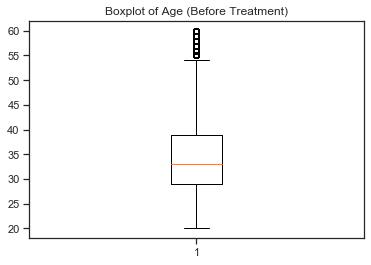

In [870]:
# Boxplot before treatment
plt.boxplot(df_new['age'].dropna())
plt.title('Boxplot of Age (Before Treatment)')

plt.show()

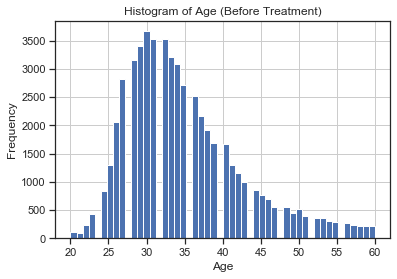

In [871]:
# Age before Outlier Treatment
plt.hist(df_new['age'], bins=50)
plt.xlabel('Age')
plt.ylabel('Frequency') 
plt.title('Histogram of Age (Before Treatment)')
plt.grid(True)

plt.show()

In [872]:
#Count the number of outliers 
num = 0
for item in df_new['age']:
    if (item > 54) | (item < 14):
        num = num + 1
outliers_not = num
total_not = len(df_new['age'])
percentage_outliers_not = (outliers_not/total_not)*100

print("% of Outliers in age: {}%".format(round(percentage_outliers_not)))

% of Outliers in age: 3%


###### Identifying outliers (no_of_trainings)

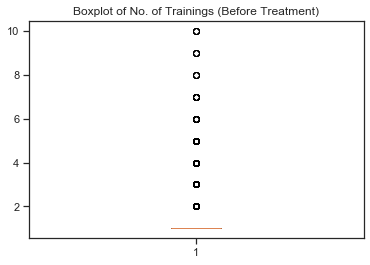

In [873]:
# Boxplot (Before Treatment)
plt.boxplot(df_new['no_of_trainings'].dropna())
plt.title('Boxplot of No. of Trainings (Before Treatment)')

plt.show()

In [874]:
df_new['no_of_trainings'].describe()

count    54808.000000
mean         1.253011
std          0.609264
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         10.000000
Name: no_of_trainings, dtype: float64

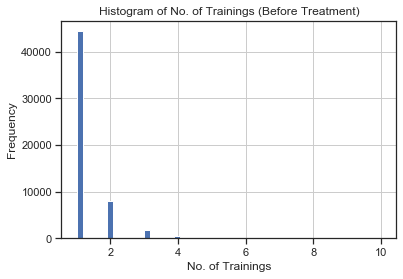

In [875]:
# Histogram (Before Treatment)
plt.hist(df_new['no_of_trainings'].dropna(), bins=50)
plt.xlabel('No. of Trainings')
plt.ylabel('Frequency') 
plt.title('Histogram of No. of Trainings (Before Treatment)')
plt.grid(True)

plt.show()

###### Treating outliers (no_of_trainings)

No Treatment.

Method #1: Removing Outliers

In [876]:
#df_new['no_of_trainings'].describe()

In [877]:
#Q1 = 1.000000
#Q3 = 1.000000
#IQR = Q3 - Q1
#Min_value = Q1 - (IQR*1.5)
#Max_value = Q3 + (IQR*1.5)
#print("Minimum value: {}".format(round(Min_value)))
#print("Maximum value: {}".format(round(Max_value)))

In [878]:
#Count the number of outliers 
#num = 0
#for item in df_new['no_of_trainings']:
    #if (item > 1) | (item < 1):
        #num = num + 1
#outliers_not = num
#total_not = len(df_new['no_of_trainings'])
#percentage_outliers_not = (outliers_not/total_not)*100

#print("% of Outliers in no_of_trainings: {}%".format(round(percentage_outliers_not)))

In [879]:
# Before removing outliers
#df_new['no_of_trainings'].describe()

In [880]:
#Count the number of outliers 
#num = 0
#for item in df_new['no_of_trainings']:
    #if item > 1) | (item < 1):
        #num = num + 1
#outliers_not = num
#total_not = len(df_new['no_of_trainings'])
#percentage_outliers_not = (outliers_not/total_not)*100

#print("% of Outliers in no_of_trainings: {}%".format(round(percentage_outliers_not)))

In [881]:
#df_new['no_of_trainings'] = df_new['no_of_trainings'][df_new['no_of_trainings'].between(df_new['no_of_trainings'].quantile(0), df_new['no_of_trainings'].quantile(.95))]

In [882]:
# After removing outliers
#df_new['no_of_trainings'].describe()

In [883]:
# Boxplot (After Treatment)
#plt.boxplot(df_new['no_of_trainings'].dropna())
#plt.title('Boxplot of No. of Trainings (Before Treatment)')

#plt.show()

In [884]:
# Histogram (After Treatment)
#plt.hist(df_new['no_of_trainings'].dropna(), bins=50)
#plt.xlabel('No. of Trainings')
#plt.ylabel('Frequency') 
#plt.title('Histogram of No. of Trainings (Before Treatment)')
#plt.grid(True)

#plt.show()

Method #2: Log Transform

In [885]:
#df_new['log_no_of_trainings'] = df_new['no_of_trainings'].between(df_new['no_of_trainings'].quantile(0), df_new['no_of_trainings'].quantile(1))
#print('Skewness before transformation: '+str(df_new['no_of_trainings'].skew()))
#print('Skewness after transformation: '+str(df_new['log_no_of_trainings'].skew()))

In [886]:
#df_new['log_no_of_trainings'].describe()

In [887]:
# Boxplot
#plt.boxplot(df_new['log_no_of_trainings'].dropna())
#plt.title('Boxplot of transformed No. of Trainings ')

#plt.show()

In [888]:
# Histogram
#plt.hist(df_new['log_no_of_trainings'].dropna(), bins=10)
#plt.xlabel('No. of Trainings')
#plt.ylabel('Frequency') 
#plt.title('Histogram of transformed No. of Trainings ')
#plt.grid(True)
#plt.show()

###### Identifying outliers (avg_training_score)

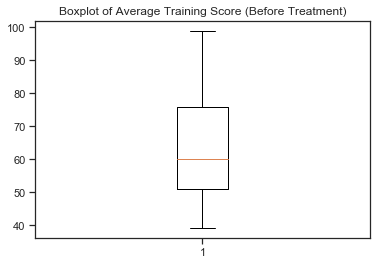

In [889]:
# Boxplot
plt.boxplot(df_new['avg_training_score'].dropna())
plt.title('Boxplot of Average Training Score (Before Treatment)')

plt.show()

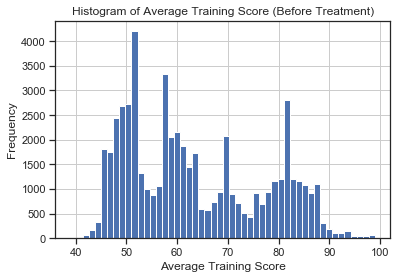

In [890]:
# Histogram before normalisation
plt.hist(df_new['avg_training_score'].dropna(), bins=50)
plt.xlabel('Average Training Score')
plt.ylabel('Frequency') 
plt.title('Histogram of Average Training Score (Before Treatment)')
plt.grid(True)

plt.show()

In [891]:
df_new['avg_training_score'].describe()

count    54808.000000
mean        63.386750
std         13.371559
min         39.000000
25%         51.000000
50%         60.000000
75%         76.000000
max         99.000000
Name: avg_training_score, dtype: float64

In [892]:
Q1 = 51.000000
Q3 = 76.000000
IQR = Q3 - Q1
Min_value = Q1 - (IQR*1.5)
Max_value = Q3 + (IQR*1.5)
print("Minimum value: {}".format(round(Min_value)))
print("Maximum value: {}".format(round(Max_value)))

Minimum value: 14
Maximum value: 114


In [893]:
#Count the number of outliers 
num = 0
df_avt = df_new['avg_training_score']
for item in df_avt:
    if (item < 14) | (item > 99):
        num = num + 1
outliers_ats = num
total_ats = len(df_new['avg_training_score'])
percentage_outliers_ats = (outliers_ats/total_ats)*100

print("% of Outliers in avg_training_score: {}%".format(round(percentage_outliers_ats)))

% of Outliers in avg_training_score: 0%


#### (iii) Feature Engineering

###### Drop the irrelevant features/ columns

In [894]:
df_new.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [895]:
df_new = df_new.drop(['employee_id'], axis = 1) 
df_new.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


###### (iv) Data Transformation

###### Encoding the Categorical Data Columns

1. Department

In [896]:
# View unique titles of department
df_new['department'].unique()

array(['Sales & Marketing', 'Operations', 'Technology', 'Analytics',
       'R&D', 'Procurement', 'Finance', 'HR', 'Legal'], dtype=object)

In [897]:
# Mapping
df_new['department'] = df_new['department'].map( {'Technology': 0, 'Procurement': 1, 'Analytics': 2, 'Operations': 3, 'Finance': 4, 'Sales & Marketing': 5, 'R&D': 6, 'HR': 7, 'Legal':8} ).astype(int)
df_new.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met,awards_won?,avg_training_score,is_promoted
0,5,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,3,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,5,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,5,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,0,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


2. Region

The values under the "region" column of the HR dataset has a "region_" character string within it and is unnecessary to the values. Hence, I have removed the "region_" so our region column will contain int values instead of categorical values. 

In [898]:
# View unique titles of regions
df_new['region'].unique()

array(['region_7', 'region_22', 'region_19', 'region_23', 'region_26',
       'region_2', 'region_20', 'region_34', 'region_1', 'region_4',
       'region_29', 'region_31', 'region_15', 'region_14', 'region_11',
       'region_5', 'region_28', 'region_17', 'region_13', 'region_16',
       'region_25', 'region_10', 'region_27', 'region_30', 'region_12',
       'region_21', 'region_8', 'region_32', 'region_6', 'region_33',
       'region_24', 'region_3', 'region_9', 'region_18'], dtype=object)

In [899]:
# Replace "regioni_" titles
df_new['region'] = df_new['region'].str.replace('region_', '')

In [900]:
# View unique titles of regions
df_new['region'].astype(int)
df_new.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met,awards_won?,avg_training_score,is_promoted
0,5,7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,3,22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,5,19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,5,23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,0,26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


3. Education

In [901]:
# View unique titles of education
df_new['education'].unique()

array(["Master's & above", "Bachelor's", 'Below Secondary'], dtype=object)

In [902]:
# Mapping
df_new['education'] = df_new['education'].map( {"Bachelor's": 0, "Below Secondary": 1, "Master's & above": 2} ).astype(int)
df_new.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met,awards_won?,avg_training_score,is_promoted
0,5,7,2,f,sourcing,1,35,5.0,8,1,0,49,0
1,3,22,0,m,other,1,30,5.0,4,0,0,60,0
2,5,19,0,m,sourcing,1,34,3.0,7,0,0,50,0
3,5,23,0,m,other,2,39,1.0,10,0,0,50,0
4,0,26,0,m,other,1,45,3.0,2,0,0,73,0


4. Gender

In [903]:
# View unique titles of gender
df_new['gender'].unique()

array(['f', 'm'], dtype=object)

In [904]:
# Mapping
df_new['gender'] = df_new['gender'].map( {"f": 0, "m": 1} ).astype(int)
df_new.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met,awards_won?,avg_training_score,is_promoted
0,5,7,2,0,sourcing,1,35,5.0,8,1,0,49,0
1,3,22,0,1,other,1,30,5.0,4,0,0,60,0
2,5,19,0,1,sourcing,1,34,3.0,7,0,0,50,0
3,5,23,0,1,other,2,39,1.0,10,0,0,50,0
4,0,26,0,1,other,1,45,3.0,2,0,0,73,0


5. Recruitment Channel

In [905]:
# View unique titles of recruitment channel
df_new['recruitment_channel'].unique()

array(['sourcing', 'other', 'referred'], dtype=object)

In [906]:
# Mapping
df_new['recruitment_channel'] = df_new['recruitment_channel'].map( {"other": 0, "sourcing": 1, "referred": 2} ).astype(int)
df_new.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met,awards_won?,avg_training_score,is_promoted
0,5,7,2,0,1,1,35,5.0,8,1,0,49,0
1,3,22,0,1,0,1,30,5.0,4,0,0,60,0
2,5,19,0,1,1,1,34,3.0,7,0,0,50,0
3,5,23,0,1,0,2,39,1.0,10,0,0,50,0
4,0,26,0,1,0,1,45,3.0,2,0,0,73,0


###### Transforming the Numeric Data Columns

(i) Length of Service 

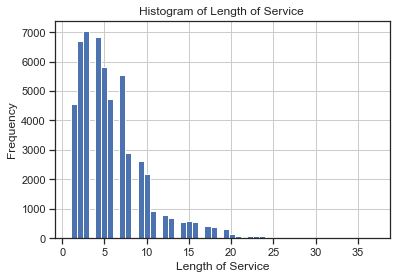

In [907]:
# Fare (before normalisation))
plt.hist(df_new['length_of_service'], bins=50)
plt.xlabel('Length of Service')
plt.ylabel('Frequency') 
plt.title('Histogram of Length of Service ')
plt.grid(True)

plt.show()

In [908]:
df_new['length_of_service'].describe()

count    54808.000000
mean         5.865512
std          4.265094
min          1.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         37.000000
Name: length_of_service, dtype: float64

In [909]:
# length_of_service values are NOT evenly distributed
# Bin / Group length_of_service values using Quantile Range

#when length_of_service <= 3, make value in length_of_service column = 0
df_new.loc[ df_new['length_of_service'] <= 3, 'length_of_service'] = 0 

#when length_of_service > 3 & <= 5, make value in length_of_service column = 1
df_new.loc[(df_new['length_of_service'] > 3) & (df_new['length_of_service'] <= 5), 'length_of_service'] = 1

#when length_of_service > 5 & <= 7, make value in length_of_service column = 2
df_new.loc[(df_new['length_of_service'] > 5) & (df_new['length_of_service'] <= 7), 'length_of_service']   = 2

#when length_of_service > 7, make value in length_of_service column = 3
df_new.loc[ df_new['length_of_service'] > 7, 'length_of_service'] = 3

#Converting all values in "length_of_service" ccolumn to integer
df_new['length_of_service'] = df_new['length_of_service'].astype(int)
df_new.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met,awards_won?,avg_training_score,is_promoted
0,5,7,2,0,1,1,35,5.0,3,1,0,49,0
1,3,22,0,1,0,1,30,5.0,1,0,0,60,0
2,5,19,0,1,1,1,34,3.0,2,0,0,50,0
3,5,23,0,1,0,2,39,1.0,3,0,0,50,0
4,0,26,0,1,0,1,45,3.0,0,0,0,73,0


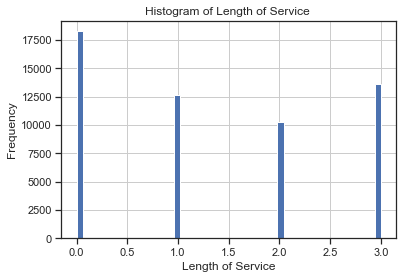

In [910]:
# Fare (after normalisation)
plt.hist(df_new['length_of_service'], bins=50)
plt.xlabel('Length of Service')
plt.ylabel('Frequency') 
plt.title('Histogram of Length of Service ')
plt.grid(True)

plt.show()

(ii) Age

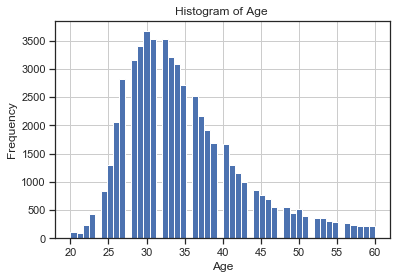

In [911]:
# Age (before normalisation)
plt.hist(df_new['age'], bins=50)

plt.xlabel('Age')
plt.ylabel('Frequency') 
plt.title('Histogram of Age ')
plt.grid(True)

plt.show()

In [912]:
df_new['age'].describe()

count    54808.000000
mean        34.803915
std          7.660169
min         20.000000
25%         29.000000
50%         33.000000
75%         39.000000
max         60.000000
Name: age, dtype: float64

In [913]:
# Min-Max normalization for AGE column
df_new["age"] = (df_new["age"] - df_new["age"].min()) / (df_new["age"].max()-df_new["age"].min())
df_new.describe()

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,3.237885,0.559316,0.702379,0.465334,1.253011,0.370098,3.304481,1.350369,0.351974,0.023172,63.386750,0.085170
std,2.086470,0.889452,0.457216,0.538959,0.609264,0.191504,1.214770,1.179007,0.477590,0.150450,13.371559,0.279137
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,39.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,1.000000,0.225000,3.000000,0.000000,0.000000,0.000000,51.000000,0.000000
50%,3.000000,0.000000,1.000000,0.000000,1.000000,0.325000,3.000000,1.000000,0.000000,0.000000,60.000000,0.000000
75%,5.000000,2.000000,1.000000,1.000000,1.000000,0.475000,4.000000,2.000000,1.000000,0.000000,76.000000,0.000000
max,8.000000,2.000000,1.000000,2.000000,10.000000,1.000000,5.000000,3.000000,1.000000,1.000000,99.000000,1.000000


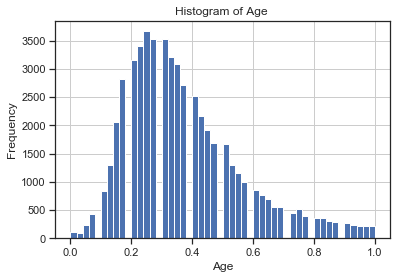

In [914]:
# Age (after normalisation)
plt.hist(df_new['age'], bins=50)
plt.xlabel('Age')
plt.ylabel('Frequency') 
plt.title('Histogram of Age ')
plt.grid(True)

plt.show()

(iii) Average Training Score

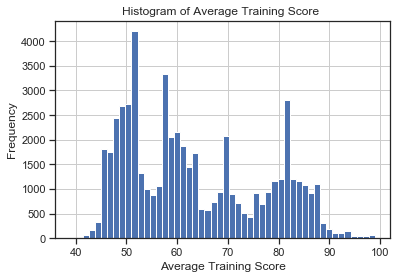

In [915]:
# Avg Training Score (before normalisation)
plt.hist(df_new['avg_training_score'], bins=50)
plt.xlabel('Average Training Score')
plt.ylabel('Frequency') 
plt.title('Histogram of Average Training Score ')
plt.grid(True)

plt.show()

In [916]:
df_new['avg_training_score'].describe()

count    54808.000000
mean        63.386750
std         13.371559
min         39.000000
25%         51.000000
50%         60.000000
75%         76.000000
max         99.000000
Name: avg_training_score, dtype: float64

In [917]:
# avg_training_score values are NOT evenly distributed
# Bin / Group avg_training_score values using Quantile Range

#when avg_training_score <=51, make value in avg_training_score column = 0
df_new.loc[ df_new['avg_training_score'] <= 51, 'avg_training_score'] = 0 

#when avg_training_score > 51 & <= 60, make value in avg_training_score column = 1
df_new.loc[(df_new['avg_training_score'] > 51) & (df_new['avg_training_score'] <= 60), 'avg_training_score'] = 1

#when avg_training_score > 60 & <= 76, make value in avg_training_score column = 2
df_new.loc[(df_new['avg_training_score'] > 60) & (df_new['avg_training_score'] <= 76), 'avg_training_score']   = 2

#when avg_training_score > 76, make value in avg_training_score column = 3
df_new.loc[ df_new['avg_training_score'] > 76, 'avg_training_score'] = 3

#Converting all values in "avg_training_score" ccolumn to integer
df_new['avg_training_score'] = df_new['avg_training_score'].astype(int)
df_new.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met,awards_won?,avg_training_score,is_promoted
0,5,7,2,0,1,1,0.375,5.0,3,1,0,0,0
1,3,22,0,1,0,1,0.250,5.0,1,0,0,1,0
2,5,19,0,1,1,1,0.350,3.0,2,0,0,0,0
3,5,23,0,1,0,2,0.475,1.0,3,0,0,0,0
4,0,26,0,1,0,1,0.625,3.0,0,0,0,2,0


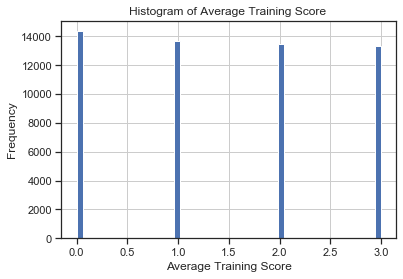

In [918]:
# Avg Training Score (after normalisation)
plt.hist(df_new['avg_training_score'], bins=50)
plt.xlabel('Average Training Score')
plt.ylabel('Frequency') 
plt.title('Histogram of Average Training Score ')
plt.grid(True)

plt.show()

### 1.3 Correlation Analysis

###### The relationship between data (Before Stratifying)

In [919]:
df_new.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met,awards_won?,avg_training_score,is_promoted
0,5,7,2,0,1,1,0.375,5.0,3,1,0,0,0
1,3,22,0,1,0,1,0.250,5.0,1,0,0,1,0
2,5,19,0,1,1,1,0.350,3.0,2,0,0,0,0
3,5,23,0,1,0,2,0.475,1.0,3,0,0,0,0
4,0,26,0,1,0,1,0.625,3.0,0,0,0,2,0


Text(0, 0.5, 'Is Promoted')

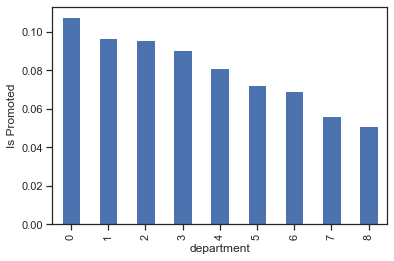

In [920]:
# department vs. is_promoted.

df_new.groupby('department').is_promoted.mean().plot.bar() 
plt.ylabel('Is Promoted')

In [921]:
# Correlation Value
column_1 = df_new['department']
column_2 = df_new['is_promoted']
correlation = column_1.corr(column_2, method='pearson')
print("Correlation value: "+ str(correlation))

Correlation value: -0.051830702748455144


Text(0, 0.5, 'Is Promoted')

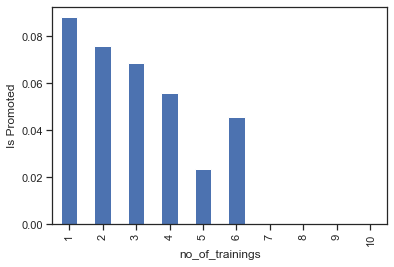

In [922]:
# no_of_trainings vs. is_promoted.

df_new.groupby('no_of_trainings').is_promoted.mean().plot.bar() 
plt.ylabel('Is Promoted')

This bar chart shows that a higher number of trainings does not determine higher chances of an employee being promoted. Assuming that '1' of is_promoted represents true while '0' represents false, the data shows that an increase in number of trainings shows an indirectly proportional drop in the average chances of an employee promotion

In [923]:
# Correlation Value
column_1 = df_new['no_of_trainings']
column_2 = df_new['is_promoted']
correlation = column_1.corr(column_2, method='pearson')
print("Correlation value: "+ str(correlation))

Correlation value: -0.02489591768241248


Text(0, 0.5, 'is_promoted')

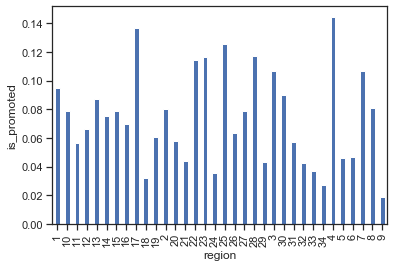

In [925]:
df_new.groupby('region').is_promoted.mean().plot.bar() 
plt.ylabel('is_promoted')

In [926]:
df_region = df_new.groupby('region').is_promoted.mean()
df_region

region
1     0.095082
10    0.078704
11    0.056274
12    0.066000
13    0.086858
14    0.074970
15    0.079060
16    0.069625
17    0.136935
18    0.032258
19    0.060641
2     0.080126
20    0.057647
21    0.043796
22    0.114188
23    0.116596
24    0.035433
25    0.125763
26    0.063274
27    0.078963
28    0.116844
29    0.043260
3     0.106936
30    0.089802
31    0.056848
32    0.042328
33    0.037175
34    0.027397
4     0.144451
5     0.045692
6     0.046377
7     0.106546
8     0.080916
9     0.019048
Name: is_promoted, dtype: float64

In [927]:
df_region.sort_values(ascending=True)

region
9     0.019048
34    0.027397
18    0.032258
24    0.035433
33    0.037175
32    0.042328
29    0.043260
21    0.043796
5     0.045692
6     0.046377
11    0.056274
31    0.056848
20    0.057647
19    0.060641
26    0.063274
12    0.066000
16    0.069625
14    0.074970
10    0.078704
27    0.078963
15    0.079060
2     0.080126
8     0.080916
13    0.086858
30    0.089802
1     0.095082
7     0.106546
3     0.106936
22    0.114188
23    0.116596
28    0.116844
25    0.125763
17    0.136935
4     0.144451
Name: is_promoted, dtype: float64

In [928]:
df_new['region'] = df_new['region'].map(df_region)

In [929]:
# Mapping 
from sklearn.preprocessing import OrdinalEncoder

# Map neighbour
ord_enc = OrdinalEncoder()
df_new["region"] = ord_enc.fit_transform(df_new[["region"]]).astype(int)

df_new["region"].unique()

array([26, 28, 13, 29, 14, 21, 12,  1, 25, 33,  6, 11, 20, 17, 10,  8, 30,
       32, 23, 16, 31, 18, 19, 24, 15,  7, 22,  5,  9,  4,  3, 27,  0,  2],
      dtype=int64)

In [930]:
#stop

Text(0, 0.5, 'is_promoted')

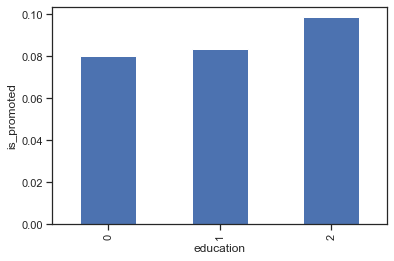

In [931]:
df_new.groupby('education').is_promoted.mean().plot.bar() 
plt.ylabel('is_promoted')

In [932]:
# Correlation Value
column_1 = df_new['education']
column_2 = df_new['is_promoted']
correlation = column_1.corr(column_2, method='pearson')
print("Correlation value: "+ str(correlation))

Correlation value: 0.029256973642761988


Text(0, 0.5, 'is_promoted')

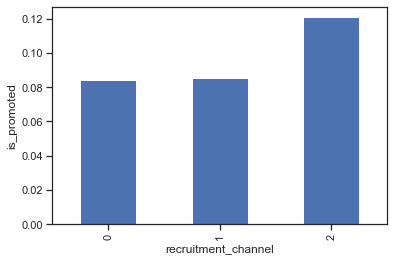

In [933]:
df_new.groupby('recruitment_channel').is_promoted.mean().plot.bar() 
plt.ylabel('is_promoted')

In [934]:
# Correlation Value
column_1 = df_new['recruitment_channel']
column_2 = df_new['is_promoted']
correlation = column_1.corr(column_2, method='pearson')
print("Correlation value: "+ str(correlation))

Correlation value: 0.009438424638096032


Text(0, 0.5, 'is_promoted')

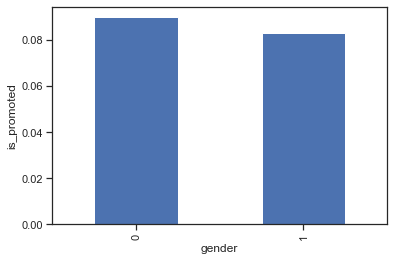

In [935]:
df_new.groupby('gender').is_promoted.mean().plot.bar() 
plt.ylabel('is_promoted')

In [936]:
# Correlation Value
column_1 = df_new['gender']
column_2 = df_new['is_promoted']
correlation = column_1.corr(column_2, method='pearson')
print("Correlation value: "+ str(correlation))

Correlation value: -0.011109141143915806


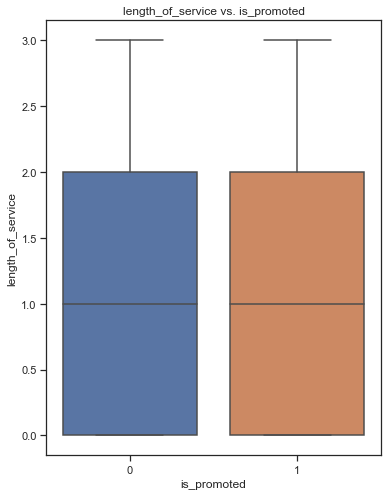

In [937]:
# length_of_service vs. is_promoted
plt.figure(figsize=(6,8))
sns.boxplot(y='length_of_service', x='is_promoted', data=df_new)
plt.title('length_of_service vs. is_promoted')
plt.show()

The boxplot above shows the relationship between the length of service and the result of an employee being promoted or not. The chart suggests that promoted and non-promoted employees of that year had an average of 5 years sf service.

In [938]:
# Correlation Value
column_1 = df_new['length_of_service']
column_2 = df_new['is_promoted']
correlation = column_1.corr(column_2, method='pearson')
print("Correlation value: "+ str(correlation))

Correlation value: -0.0029672193361844484


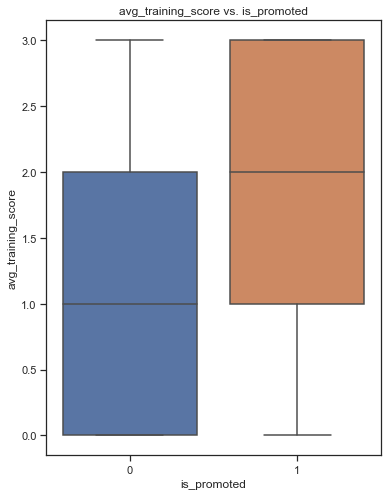

In [939]:
# avg_training_score vs. avg_training_score
plt.figure(figsize=(6,8))
sns.boxplot(y='avg_training_score', x='is_promoted', data=df_new)
plt.title('avg_training_score vs. is_promoted')
plt.show()

When comparing the average training score with employee promotion, we see a clear trend where an employee with higher training score tends to be promoted in the company.

In [940]:
# Correlation Value
column_1 = df_new['avg_training_score']
column_2 = df_new['is_promoted']
correlation = column_1.corr(column_2, method='pearson')
print("Correlation value: "+ str(correlation))

Correlation value: 0.14629917990126956


Text(0, 0.5, 'Is Promoted')

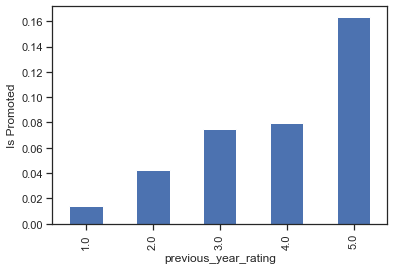

In [941]:
# previous_year_rating vs is_promoted
df_new.groupby('previous_year_rating').is_promoted.mean().plot.bar() 
plt.ylabel('Is Promoted')

There is an obvious trend between the previous year rating of employees and chances to them being promoted. As shown above, employees with a rating of 5 is more likely guaranteed a promotion than employees with a rating of 1. Nonetheless, it is not a fully guaranteed promotion as we see that the average promotion value is 0.16 out of 1 (16%).

In [942]:
# Correlation Value
column_1 = df_new['previous_year_rating']
column_2 = df_new['is_promoted']
correlation = column_1.corr(column_2, method='pearson')
print("Correlation value: "+ str(correlation))

Correlation value: 0.1532300287065112


Text(0, 0.5, 'Is Promoted')

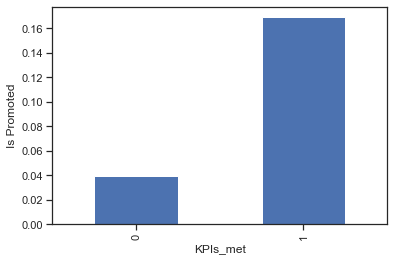

In [943]:
# KPIs_met vs is_promoted
df_new.groupby('KPIs_met').is_promoted.mean().plot.bar() 
plt.ylabel('Is Promoted')

In [944]:
# Correlation Value
column_1 = df_new['KPIs_met']
column_2 = df_new['is_promoted']
correlation = column_1.corr(column_2, method='pearson')
print("Correlation value: "+ str(correlation))

Correlation value: 0.22158153967701022


Text(0, 0.5, 'Is Promoted')

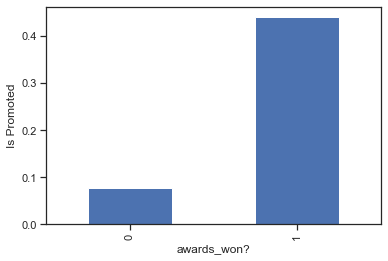

In [945]:
# awards won vs is_promoted
df_new.groupby('awards_won?').is_promoted.mean().plot.bar() 
plt.ylabel('Is Promoted')

In [946]:
# Correlation Value
column_1 = df_new['awards_won?']
column_2 = df_new['is_promoted']
correlation = column_1.corr(column_2, method='pearson')
print("Correlation value: "+ str(correlation))

Correlation value: 0.19587099636664856


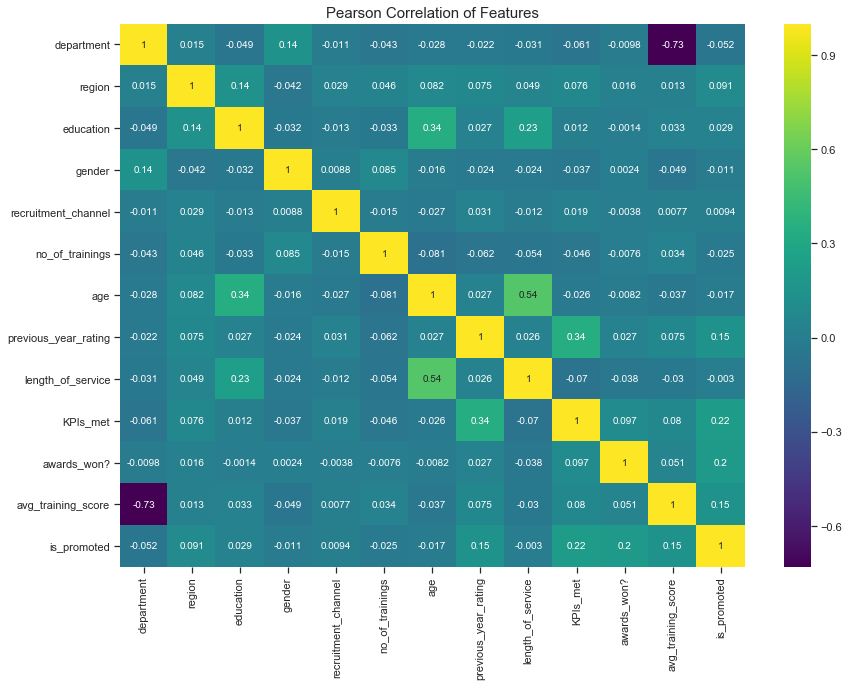

In [947]:
# Before stratifying: Heatmap: the correlation between any two features/variables
colormap = plt.cm.viridis
plt.figure(figsize=(14,10))
plt.title('Pearson Correlation of Features', size=15)
ax = sns.heatmap(df_new.astype(float).corr(), cmap=colormap, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

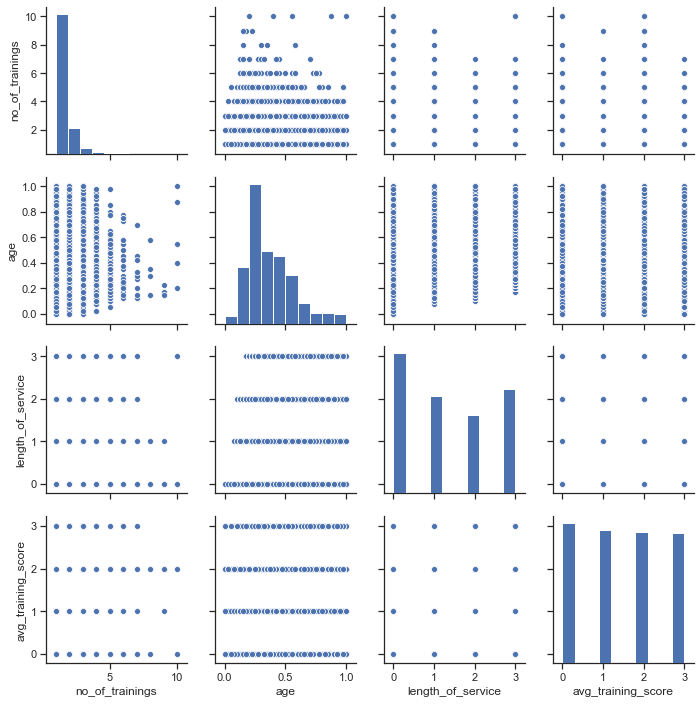

In [948]:
# Before stratifying - scatter matrix
sns.set(style="ticks")
sns.pairplot(df_new[['no_of_trainings', 'age', 'length_of_service', 'avg_training_score']])

### 1.4 Others

###### Stratified Sampling

In [949]:
df_new['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [950]:
df1=df_new[df_new['is_promoted']==1]
df1.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met,awards_won?,avg_training_score,is_promoted
11,5,26,0,0,1,1,0.375,5.0,0,1,0,0,1
39,5,30,0,1,1,1,0.325,5.0,2,1,0,0,1
60,5,33,2,1,0,1,0.750,4.0,3,1,0,0,1
66,4,28,0,1,0,1,0.175,3.0,0,1,1,1,1
67,5,28,0,1,1,1,0.175,3.0,0,0,0,2,1


In [951]:
len(df1)

4668

In [952]:
df0=df_new[df_new['is_promoted']==0]
df0.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met,awards_won?,avg_training_score,is_promoted
0,5,26,2,0,1,1,0.375,5.0,3,1,0,0,0
1,3,28,0,1,0,1,0.250,5.0,1,0,0,1,0
2,5,13,0,1,1,1,0.350,3.0,2,0,0,0,0
3,5,29,0,1,0,2,0.475,1.0,3,0,0,0,0
4,0,14,0,1,0,1,0.625,3.0,0,0,0,2,0


In [953]:
df0_sampled = df0.sample(n=len(df1), random_state=2).copy()
df0_sampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4668 entries, 6725 to 12976
Data columns (total 13 columns):
department              4668 non-null int32
region                  4668 non-null int32
education               4668 non-null int32
gender                  4668 non-null int32
recruitment_channel     4668 non-null int32
no_of_trainings         4668 non-null int64
age                     4668 non-null float64
previous_year_rating    4668 non-null float64
length_of_service       4668 non-null int32
KPIs_met                4668 non-null int64
awards_won?             4668 non-null int64
avg_training_score      4668 non-null int32
is_promoted             4668 non-null int64
dtypes: float64(2), int32(7), int64(4)
memory usage: 382.9 KB


In [954]:
# Concatenate df1 with df0_sampled 
df_new=pd.concat([df1,df0_sampled],axis=0)
df_new['is_promoted'].value_counts()

1    4668
0    4668
Name: is_promoted, dtype: int64

In [955]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9336 entries, 11 to 12976
Data columns (total 13 columns):
department              9336 non-null int32
region                  9336 non-null int32
education               9336 non-null int32
gender                  9336 non-null int32
recruitment_channel     9336 non-null int32
no_of_trainings         9336 non-null int64
age                     9336 non-null float64
previous_year_rating    9336 non-null float64
length_of_service       9336 non-null int32
KPIs_met                9336 non-null int64
awards_won?             9336 non-null int64
avg_training_score      9336 non-null int32
is_promoted             9336 non-null int64
dtypes: float64(2), int32(7), int64(4)
memory usage: 765.8 KB


In [956]:
df_new.describe()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met,awards_won?,avg_training_score,is_promoted
count,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000
mean,3.063946,21.503106,0.598115,0.695587,0.473329,1.228685,0.364923,3.579799,1.332262,0.508569,0.066945,1.721615,0.500000
std,2.063918,7.197824,0.907632,0.460183,0.547611,0.567723,0.186246,1.176841,1.179422,0.499953,0.249940,1.115671,0.500027
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,19.000000,0.000000,0.000000,0.000000,1.000000,0.225000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,3.000000,21.000000,0.000000,1.000000,0.000000,1.000000,0.325000,3.000000,1.000000,1.000000,0.000000,2.000000,0.500000
75%,5.000000,28.000000,2.000000,1.000000,1.000000,1.000000,0.450000,5.000000,2.000000,1.000000,0.000000,3.000000,1.000000
max,8.000000,33.000000,2.000000,1.000000,2.000000,7.000000,1.000000,5.000000,3.000000,1.000000,1.000000,3.000000,1.000000


Text(0, 0.5, 'Is Promoted')

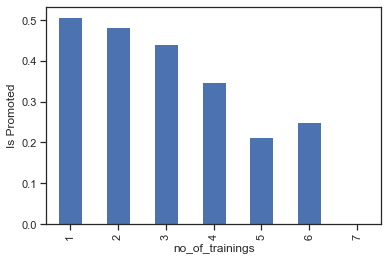

In [957]:
# no_of_trainings vs. is_promoted.

df_new.groupby('no_of_trainings').is_promoted.mean().plot.bar() 
plt.ylabel('Is Promoted')

In [958]:
# Correlation Value
column_1 = df_new['no_of_trainings']
column_2 = df_new['is_promoted']
correlation = column_1.corr(column_2, method='pearson')


print("Correlation value (before stratifying): "+ "-0.0173543790500967")   
print("Correlation value (after stratifying): "+ str(correlation))

Correlation value (before stratifying): -0.0173543790500967
Correlation value (after stratifying): -0.04471716659169498


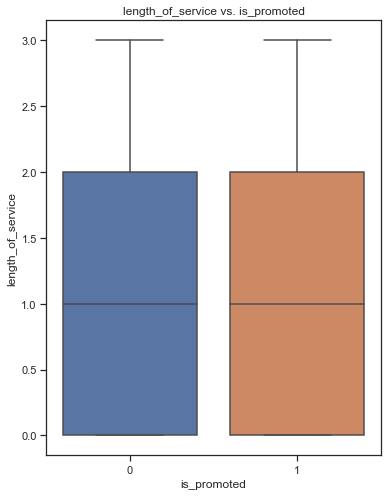

In [959]:
# length_of_service vs. is_promoted
plt.figure(figsize=(6,8))
sns.boxplot(y='length_of_service', x='is_promoted', data=df_new)
plt.title('length_of_service vs. is_promoted')
plt.show()

In [960]:
# Correlation Value
column_1 = df_new['length_of_service']
column_2 = df_new['is_promoted']
correlation = column_1.corr(column_2, method='pearson')

print("Correlation value (before stratifying): "+ "0.0028758737045631263")   
print("Correlation value (after stratifying): "+ str(correlation))

Correlation value (before stratifying): 0.0028758737045631263
Correlation value (after stratifying): 0.005630991812536149


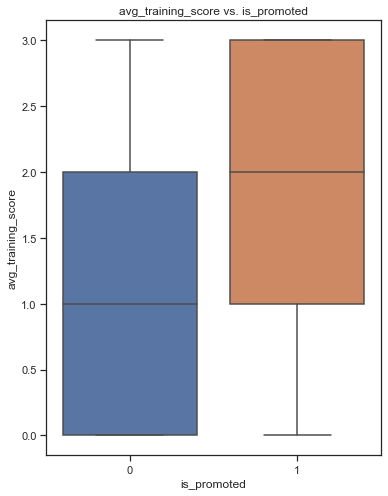

In [961]:
# avg_training_score vs. avg_training_score
plt.figure(figsize=(6,8))
sns.boxplot(y='avg_training_score', x='is_promoted', data=df_new)
plt.title('avg_training_score vs. is_promoted')
plt.show()

In [962]:
# Correlation Value
column_1 = df_new['length_of_service']
column_2 = df_new['is_promoted']
correlation = column_1.corr(column_2, method='pearson')

print("Correlation value (before stratifying): "+ "0.14553798530247652")   
print("Correlation value (after stratifying): "+ str(correlation))

Correlation value (before stratifying): 0.14553798530247652
Correlation value (after stratifying): 0.005630991812536149


Text(0, 0.5, 'Is Promoted')

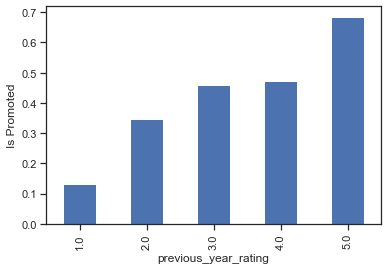

In [963]:
# previous_year_rating vs is_promoted
df_new.groupby('previous_year_rating').is_promoted.mean().plot.bar() 
plt.ylabel('Is Promoted')

In [964]:
# Correlation Value
column_1 = df_new['length_of_service']
column_2 = df_new['is_promoted']
correlation = column_1.corr(column_2, method='pearson')

print("Correlation value (before stratifying): "+ "0.1615929625359644")   
print("Correlation value (after stratifying): "+ str(correlation))

Correlation value (before stratifying): 0.1615929625359644
Correlation value (after stratifying): 0.005630991812536149


Text(0, 0.5, 'Is Promoted')

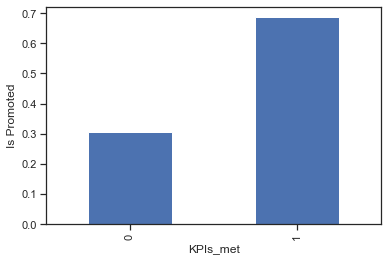

In [965]:
# KPIs_met vs is_promoted
df_new.groupby('KPIs_met').is_promoted.mean().plot.bar() 
plt.ylabel('Is Promoted')

In [966]:
# Correlation Value
column_1 = df_new['length_of_service']
column_2 = df_new['is_promoted']
correlation = column_1.corr(column_2, method='pearson')

print("Correlation value (before stratifying): "+ "0.38051861004158866")   
print("Correlation value (after stratifying): "+ str(correlation))

Correlation value (before stratifying): 0.38051861004158866
Correlation value (after stratifying): 0.005630991812536149


Text(0, 0.5, 'Is Promoted')

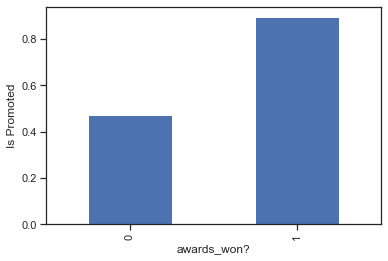

In [967]:
# awards won vs is_promoted
df_new.groupby('awards_won?').is_promoted.mean().plot.bar() 
plt.ylabel('Is Promoted')

In [968]:
# Correlation Value
column_1 = df_new['length_of_service']
column_2 = df_new['is_promoted']
correlation = column_1.corr(column_2, method='pearson')

print("Correlation value (before stratifying): "+ "0.21128706178402792")   
print("Correlation value (after stratifying): "+ str(correlation))

Correlation value (before stratifying): 0.21128706178402792
Correlation value (after stratifying): 0.005630991812536149


In [969]:
# After stratifying: This shows the correlations between the variables
df_new.corr()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met,awards_won?,avg_training_score,is_promoted
department,1.000000,0.015883,-0.052672,0.158550,-0.010575,-0.038537,-0.016772,-0.066912,-0.031613,-0.065883,-0.019098,-0.669068,-0.087452
region,0.015883,1.000000,0.126713,-0.018763,0.027525,0.038401,0.034639,0.077443,0.030491,0.096159,0.036773,0.049885,0.166277
education,-0.052672,0.126713,1.000000,-0.038768,-0.022861,-0.033673,0.377796,0.048080,0.246339,0.024351,0.015667,0.035915,0.051220
gender,0.158550,-0.018763,-0.038768,1.000000,0.020915,0.077464,-0.030575,-0.022987,-0.033694,-0.026376,0.006760,-0.045104,-0.021415
recruitment_channel,-0.010575,0.027525,-0.022861,0.020915,1.000000,-0.016387,-0.043611,0.019593,-0.027577,0.019029,-0.001433,0.017566,0.015844
no_of_trainings,-0.038537,0.038401,-0.033673,0.077464,-0.016387,1.000000,-0.073286,-0.058502,-0.039417,-0.034267,-0.020329,0.043356,-0.044717
age,-0.016772,0.034639,0.377796,-0.030575,-0.043611,-0.073286,1.000000,0.050753,0.529739,-0.026295,-0.000293,-0.050569,-0.030066
previous_year_rating,-0.066912,0.077443,0.048080,-0.022987,0.019593,-0.058502,0.050753,1.000000,0.047810,0.276950,0.057770,0.126618,0.284443
length_of_service,-0.031613,0.030491,0.246339,-0.033694,-0.027577,-0.039417,0.529739,0.047810,1.000000,-0.033351,-0.051843,-0.031298,0.005631
KPIs_met,-0.065883,0.096159,0.024351,-0.026376,0.019029,-0.034267,-0.026295,0.276950,-0.033351,1.000000,0.038701,0.023578,0.380519


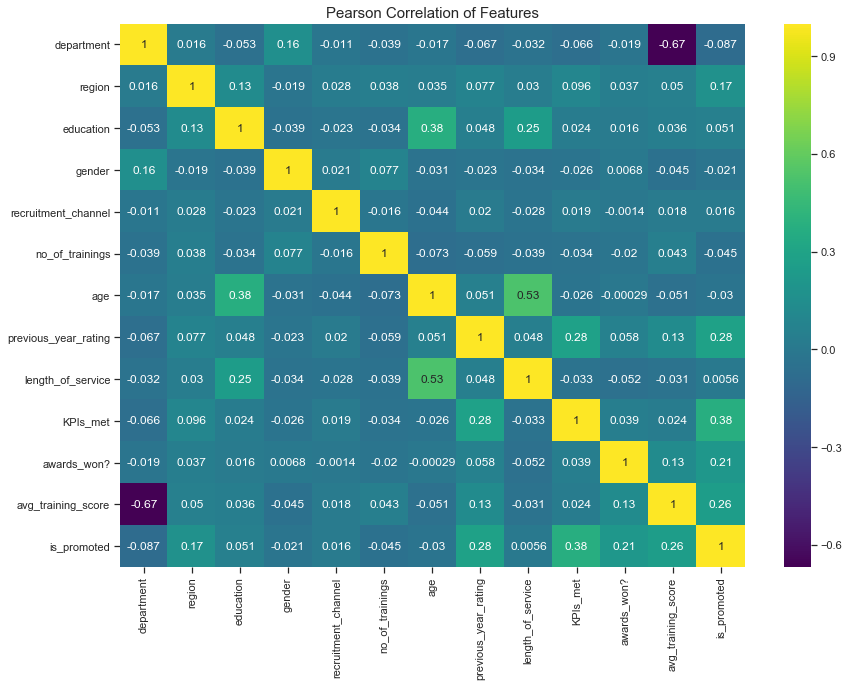

In [970]:
# After stratifying: Heatmap: the correlation between any two features/variables
colormap = plt.cm.viridis
plt.figure(figsize=(14,10))
plt.title('Pearson Correlation of Features', size=15)
ax = sns.heatmap(df_new.astype(float).corr(), cmap=colormap, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

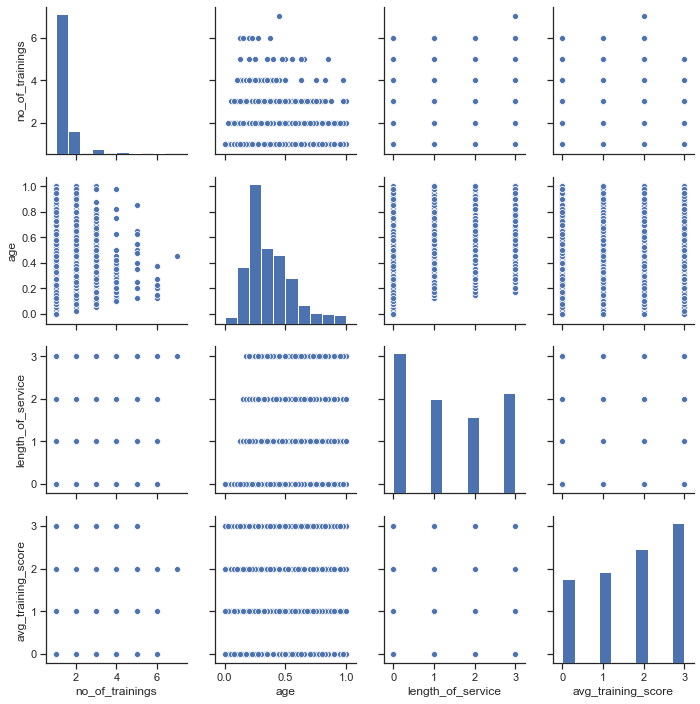

In [971]:
#After stratifying - scatter matrix
sns.set(style="ticks")
sns.pairplot(df_new[['no_of_trainings', 'age', 'length_of_service', 'avg_training_score']])

In [972]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9336 entries, 11 to 12976
Data columns (total 13 columns):
department              9336 non-null int32
region                  9336 non-null int32
education               9336 non-null int32
gender                  9336 non-null int32
recruitment_channel     9336 non-null int32
no_of_trainings         9336 non-null int64
age                     9336 non-null float64
previous_year_rating    9336 non-null float64
length_of_service       9336 non-null int32
KPIs_met                9336 non-null int64
awards_won?             9336 non-null int64
avg_training_score      9336 non-null int32
is_promoted             9336 non-null int64
dtypes: float64(2), int32(7), int64(4)
memory usage: 1.1 MB


In [973]:
df_new.describe()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met,awards_won?,avg_training_score,is_promoted
count,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000
mean,3.063946,21.503106,0.598115,0.695587,0.473329,1.228685,0.364923,3.579799,1.332262,0.508569,0.066945,1.721615,0.500000
std,2.063918,7.197824,0.907632,0.460183,0.547611,0.567723,0.186246,1.176841,1.179422,0.499953,0.249940,1.115671,0.500027
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,19.000000,0.000000,0.000000,0.000000,1.000000,0.225000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,3.000000,21.000000,0.000000,1.000000,0.000000,1.000000,0.325000,3.000000,1.000000,1.000000,0.000000,2.000000,0.500000
75%,5.000000,28.000000,2.000000,1.000000,1.000000,1.000000,0.450000,5.000000,2.000000,1.000000,0.000000,3.000000,1.000000
max,8.000000,33.000000,2.000000,1.000000,2.000000,7.000000,1.000000,5.000000,3.000000,1.000000,1.000000,3.000000,1.000000


In [974]:
df_new.isnull().sum()

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met                0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

### 1.4 Export the data

In [975]:
# Write prepared data to csv file
# Enter your code here:
df_new.to_csv('hr_data_new.csv', index=False)